#Students Performance in Exams - Statistical Analysis

## uploading the data set

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/StudentsPerformance.csv")

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

In [ ]:
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#Analysis Steps:-
##Descriptive Statistics:


In [ ]:
def summery (data):
   print("mean=",data.mean())
   print("median=",data.median())
   print("mode=",data.mode())
   print("std=",data.std())
   print("min=",data.min())
   print("max=",data.max())


In [ ]:
summery(df['math score'])


mean= 66.089
median= 66.0
mode= 0    65
Name: math score, dtype: int64
std= 15.16308009600945
min= 0
max= 100


In [ ]:
summery(df["reading score"])

mean= 69.169
median= 70.0
mode= 0    72
Name: reading score, dtype: int64
std= 14.600191937252216
min= 17
max= 100


In [ ]:
summery(df["writing score"])

mean= 68.054
median= 69.0
mode= 0    74
Name: writing score, dtype: int64
std= 15.19565701086965
min= 10
max= 100


#Identify and Handle Outliers

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

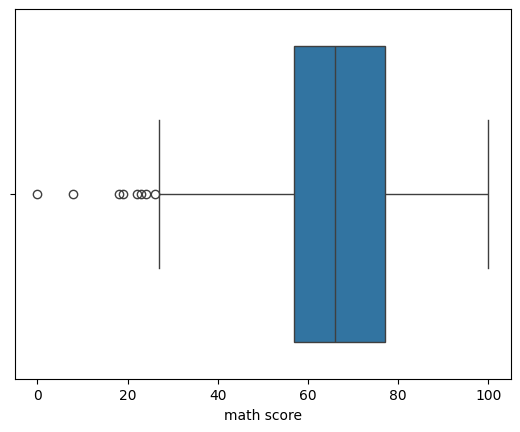

In [ ]:
sns.boxplot(x= df['math score'])
plt.show()

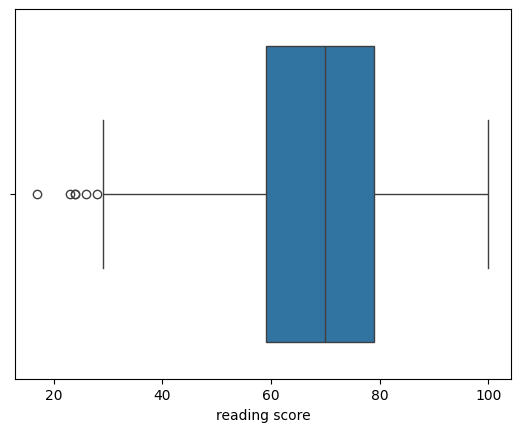

In [ ]:
sns.boxplot(x=df["reading score"])
plt.show()

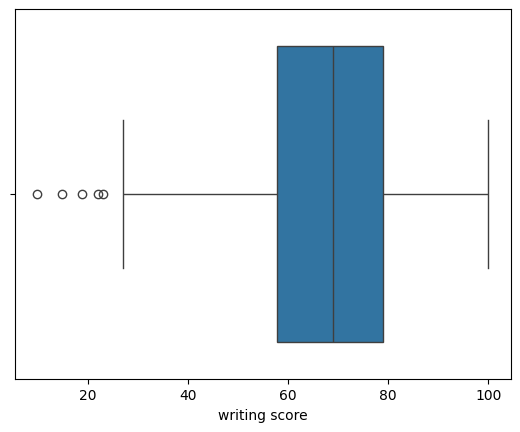

In [ ]:
sns.boxplot(x=df["writing score"])
plt.show()

### finding IQR

In [ ]:
q1= df["math score"].quantile(0.25)
q3= df["math score"].quantile(0.75)


In [ ]:
mathiqr = q3-q1


In [ ]:
print(f"math iqr is {mathiqr}")

math iqr is 20.0


In [ ]:
q1= df["reading score"].quantile(0.25)
q3= df["reading score"].quantile(0.75)


In [ ]:
readiqr = q3-q1

In [ ]:
print(f"reading irq is {readiqr}")

reading irq is 20.0


In [ ]:
q1= df["writing score"].quantile(0.25)
q3= df["writing score"].quantile(0.75)


In [ ]:
writeiqr = q3- q1

In [ ]:
print(f"writing iqr is{writeiqr}")

writing iqr is21.25


###lower and upper bound for following coloumns

####MATH

In [ ]:
lowerbound = q1-1.5*mathiqr
upperbound = q3+1.5*mathiqr
print(f"lower bound of mathiqr is ={lowerbound}")
print(f"upper bound of mathiqr is={upperbound}")

lower bound of mathiqr is =27.75
upper bound of mathiqr is=109.0


#### reading score

In [ ]:
lowerbound = q1 -1.5*readiqr
upperbound = q3+1.5*readiqr
print(f"lower bound readiqr is = {lowerbound}")
print(f"upper bound readiqr is = {upperbound}")


lower bound readiqr is = 27.75
upper bound readiqr is = 109.0


#### write score

In [ ]:
lowerbound = q1-1.5*writeiqr
upperbound = q3+1.5*writeiqr
print(f"lower bound write iqr is ={lowerbound}")
print(f"upper bound write iqr is = {upperbound}")

lower bound write iqr is =25.875
upper bound write iqr is = 110.875


### removing outliers

In [ ]:
df = df[(df['math score']>=lowerbound) & (df['math score']<=upperbound)]

In [ ]:
df = df[(df['reading score']>=lowerbound) & (df['reading score']<=upperbound)]

In [ ]:
df = df[(df['writing score']>=lowerbound) & (df['writing score']<=upperbound)]

### Check Distribution and Skewness

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='math score', ylabel='Density'>

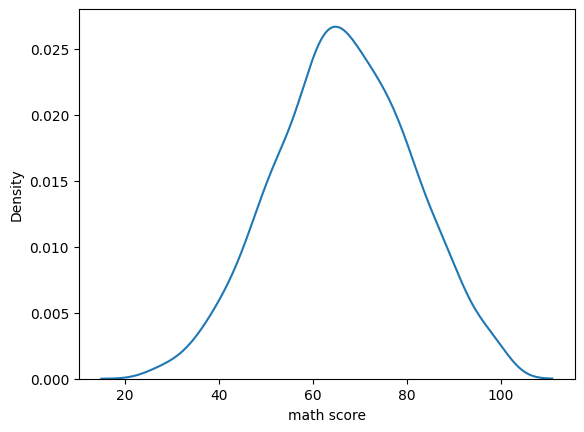

In [ ]:
sns.kdeplot(df['math score'])

<Axes: xlabel='reading score', ylabel='Density'>

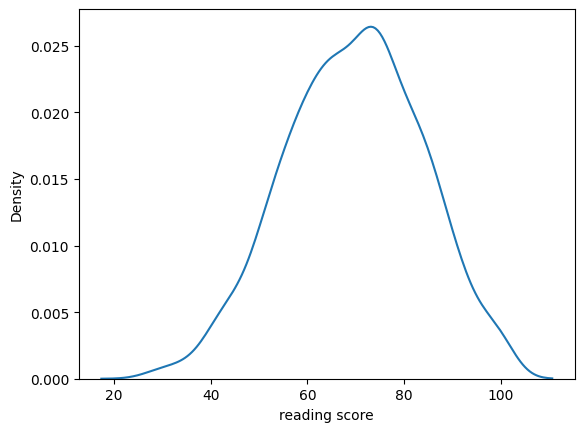

In [ ]:
sns.kdeplot(df['reading score'])

<Axes: xlabel='writing score', ylabel='Density'>

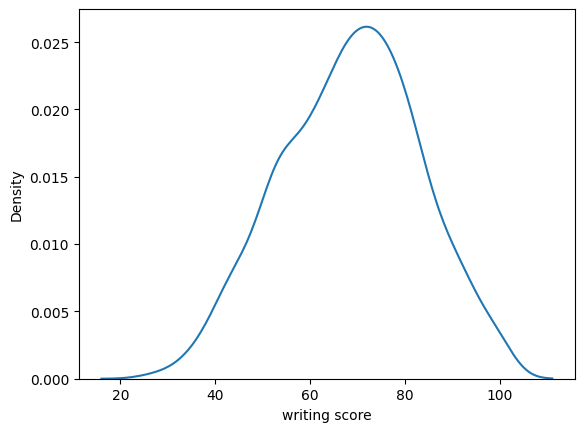

In [ ]:
sns.kdeplot(df['writing score'])

## calculate the skewness core

In [ ]:
from scipy.stats import skew

In [ ]:
skewness = skew(df['math score'])
print(f"Skewness of math score: {skewness}")

Skewness of math score: -0.05604561749429327


In [ ]:
skewness = skew(df['writing score'])
print(f"Skewness of writing score: {skewness}")

Skewness of writing score: -0.1242623983056354


In [ ]:
skewness = skew(df['reading score'])
print(f"Skewness of reading score: {skewness}")

Skewness of reading score: -0.13464963827424073


#### All distributions are approximately symmetric with very slight left negative skew.
No transformation needed the data is already nearly normally distributed.

# Hypothesis Testing


##Formulate Hypotheses

#### Null Hypothesis (H0)
#### Alternative hypothesis(H1)


Null hypothesis testing
Hear the mean of math score H 0:
 μ
test completed=μ
not completed
​


alternative hypothesis testing hear mean of math score
H
1
​
 :μ test
completed
​
≠μ
not completed
​


##Significance Level

significance level hypothesis test α = 0.05
 After T testing have to check the P_value if the P_value is is <0.05 have to reject the null hypothesis.
 After the T testing have to check the  P_value if the p_value is >0.05 fail to reject the null hypothesis.  
  


# t-test Test Statistic & p-value

In [ ]:
testcompleted =df[df['test preparation course']=='completed']['math score']
testNotcompleted =df[df['test preparation course']=='none']['math score']

In [ ]:
from scipy import stats

In [ ]:
t_stat,p_value = stats.ttest_ind(testcompleted,testNotcompleted)

In [ ]:
print(f"T-statistic:{t_stat}")
print(f"p_value:{p_value}")

T-statistic:5.41556655546056
p_value:7.673004870077015e-08


t value is 5.4
p value is 7.6 this is greater than 0.05

### Decision

Based on the t-test results, fail to reject the null_hypothesis.

mean of math score is equal to test preparation course so fail to reject the null hypothesis